# Appendix - Ethene and Butadiene

Writing code for ethene and butadiene was an important part of my senior scholarship, and while not directly relevant to other sections of my project, I have decided to include my calculations and generated plots in this appendix.

Ethene:
```{image} ../images/ethene.jpg
:alt: Ethene
:width: 150px
:align: center
```
Butadiene:

```{image} ../images/butadiene.jpg
:alt: Butadiene
:width: 250px
:align: center
```

## Ethene

Hückel matrix for ethene:

$$
H=α1+β\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}
$$

Code to calculate coefficients:

In [2]:
#Program to output Hückel coefficients
import numpy as np
import numpy.linalg

atoms = 2
matrix = [[0,1],[1,0]]
matrix = np.matrix(matrix)  
energy, eigvec = numpy.linalg.eig(matrix)
eigvec = eigvec.tolist()

coefficient = [0] * atoms
for x in range (atoms):
    coefficient[x] = [0] * atoms 
for i in range (0,atoms):
    for j in range (0,atoms):
        coefficient[i][j] = eigvec[j][i]
coefficient = np.matrix(coefficient)
print('Energies:', energy)
print('Coefficients:', coefficient)

Energies: [ 1. -1.]
Coefficients: [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


Molecular orbitals:

$$
E_1= α+1β , ψ_1=0.71χ_1+0.71χ_2
$$
$$
E_2= α-1β,ψ_2=-0.71χ_1+0.71χ_2
$$

Outputted plots (sigma framework below). The lowest energy orbital is filled:

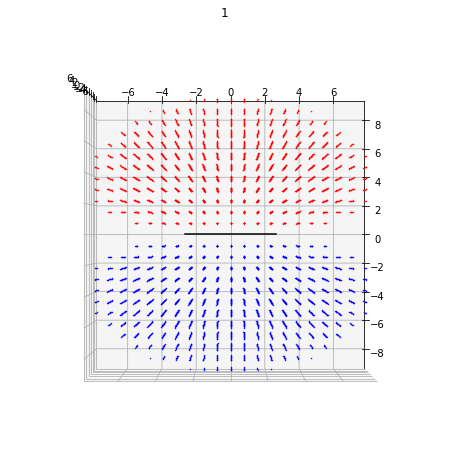

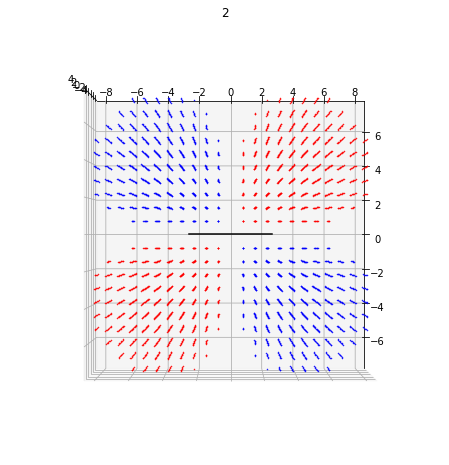

In [5]:
# Ethene - 90% Plot

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
from scipy.special import sph_harm
import math
%matplotlib inline

n = 1
l = 0
m = 0
Z = 1

# Constants
na = 6.02*np.power(10, 23)
h = 6.63/np.power(10, 34)
c = 3*np.power(10, 8)
    
# Value of beta in jmol-1
beta_si = 230000
# Value of beta per molecule
beta = beta_si/na


# Radial distribution function
def  radial_distribution(r, n, l, Z_eff):
    rho = 2.0 * Z_eff * r / n    
    p = Z*r
    if n == 1  and l == 0 :
        return 2*(Z**1.5)*np.exp(-p)
    elif n == 2  and l == 0 :
         return ((Z/2)**1.5)*(2-p)*np.exp(-p/2)
    elif n == 2  and l == 1:
         return (1/(np.sqrt(3))*((Z/2)**1.5)*p*np.exp(-p/2))
    elif n == 3  and l == 0 :
         return (2/27)*((Z/3)**1.5)*(27-18*p+2*(p**2))*np.exp(-p/3)
    elif n == 3 and l == 1 :
         return (1/27)*((2*Z/3)**1.5)*p*(6-p)*np.exp(-p/3)
    elif n == 3  and l == 2 :
         return (4/(27*np.sqrt(10)))*((Z/3)**1.5)*(p**2)*np.exp(-p/3)

def  spherical_harmonics (theta, phi, l, m):
    if l == 0 :
        if m == 0 :
             # l = 0, m = 0 
            return np.sqrt ( 1.0 / ( 4 * np.pi))
    elif l == 1 :
         if m == 0 :
             # l = 1, m = 0 
            return np.sqrt ( 3.0 / ( 4.0 * np.pi)) * np.cos ( theta)
         if m == 1 :
             # l = 1, m = + 1 
            return np.sqrt (3.0 / ( 4.0 * np.pi)) * np.sin (theta) * np.cos (phi)
         if m ==- 1 :
             # l = 1, m = + 1 
            return np.sqrt ( 3.0 / ( 4.0 * np.pi)) * np.sin (theta) * np.sin (phi)
    else:
         if m == 0 :
            return np.sqrt ( 5.0 / ( 16.0 * np.pi)) * ( 3.0 * (np.cos (theta) ** 2 ) -1.0 )
         if m == 1 :
            return np.sqrt ( 15.0 )/ ( 4.0 * np.pi) * np.cos (theta) * np.sin (theta) * np.cos (phi)
         if m ==- 1 :
            return np.sqrt ( 15.0 / ( 4.0 * np.pi )) * np.cos (theta) * np.sin (theta) * np.sin (phi)
         if m == 2 :
            return np.sqrt ( 15.0 / ( 16.0 * np.pi)) * (np.sin ( theta) ** 2 ) * np.cos ( 2 * phi)
         if m == --2 :
            return np.sqrt ( 15.0 / ( 16.0 * np.pi)) * (np.sin (theta) ** 2) * np.sin ( 2 * phi)

def f(x, y, z, n, l, m, Z_eff): 
        #Convert cartesian coordinate system to polar 
        r = np.sqrt (x * x + y * y + z * z)
        Z = 6-( 0.35 * 3 + 0.85 * 2 )
        theta = 0.0 
        phi = 0.0 
        if r> 0 :
            theta = np.arccos (z / r)
        if y == 0 :
             if x < 0 :
                phi = np.pi
        elif x * x + y * y> 0 :
            phi = np.sign (y) * np.arccos (x / np.sqrt (x * x + y * y))

        # Return the wavefunction of the orbital
        return (radial_distribution(r, n, l, Z_eff) * spherical_harmonics(theta, phi, l, m))

def ethene(x, y, z, n, l, m, Z_eff):
    # Quantum numbers - Hydrogen 1s
    n = 2
    l = 1
    m = 1
    Z = 6-( 0.35 * 3 + 0.85 * 2 )
    # Distance between atoms
    atomic_distance = (133.9 / 52.9)*2
    coefficient = 0.707
    if orbital == 0:
        return coefficient*(f(x, y-atomic_distance/2, z, n, l, m, Z)+f(x, y+atomic_distance/2, z, n, l, m, Z))
    else:
        return coefficient*(f(x, y-atomic_distance/2, z, n, l, m, Z)-f(x, y+atomic_distance/2, z, n, l, m, Z))

for orbital in range (2):
    
    # Lists for positive data
    x_pos_list = []
    y_pos_list = []
    z_pos_list = []

    # Lists for negative data
    x_neg_list = []
    y_neg_list = []
    z_neg_list = []

    data = []

    N = 40
    spread = 15
    space = 2*spread/N
    prob = 0.0

    for i in range (N):
        for j in range (N):
            for k in range (N):
                
                x = i*space-spread
                y = j*space-spread
                z = k*space-spread
                f_1 = ethene(x, y, z, n, l, m, Z)
                # Probability distribution function
                f_2 = f_1**2
                data.append([f_2,x,y,z,f_1])
                prob = prob+f_2*space**3
    data = sorted(data, key =lambda data: data[0], reverse=True)
    total = 0.0
    i = 0
    while total<0.9*prob:
        x = data[i][1]
        y = data[i][2]
        z = data[i][3]
        total = total+(data[i][0])*space**3
        if data[i][4] >0:
            x_pos_list.append (x)
            y_pos_list.append (y)
            z_pos_list.append (z)
        else:
            x_neg_list.append (x)
            y_neg_list.append (y)
            z_neg_list.append (z) 
        i = i+1


    # Positive values
    Xpos = np.array (x_pos_list)
    Ypos = np.array (y_pos_list)
    Zpos = np.array (z_pos_list)

    # Negative values
    Xneg = np.array (x_neg_list)
    Yneg = np.array (y_neg_list)
    Zneg = np.array (z_neg_list)
    
    fig = plt.figure (figsize = ( 8.0 , 8.0 ))
    ax = fig.add_subplot ( 1 , 1 , 1 , projection = '3d' )
    
    x_range = spread
    ax.set_xlim3d (-x_range, x_range)
    ax.set_ylim3d (-x_range, x_range)
    ax.set_zlim3d (-x_range, x_range)

    # Plotting the sigma framework
    atomic_distance = (133.9 / 52.9)
    x = [0,0]
    y = [-atomic_distance,atomic_distance]
    z = [0,0]
    ax.plot3D(x, y, z, 'black')
    
    # Finding the max and min values for each axis in order to scale the axes
    ymin = min(min(Ypos), min(Yneg))
    ymax = max(max(Ypos), max(Yneg))
    zmin = min(min(Zpos), min(Zneg))
    zmax = max(max(Zpos), max(Zneg))
    
    ax.set_xlim3d (max(max(Xpos), max(Xneg)), min(min(Xpos), min(Xneg)))
    ax.set_ylim3d (ymin, ymax)
    ax.set_zlim3d (zmin, zmax)
    ax.title.set_text("{}".format(orbital+1, 'π'))
    
    # Plot negative values in blue
    ax.plot(Xneg, Yneg, Zneg, color = 'b' , marker = "o", markersize=0.5, linestyle = 'None' )

    # Plot positive values in red
    ax.plot(Xpos, Ypos, Zpos, color = 'r' , marker = "o", markersize=0.5, linestyle = 'None' )

    ax.view_init(90, 0)
    
plt.show()

## Butadiene

Hückel matrix for ethene:

$$
H=α1+β\begin{pmatrix}
0 & 1 & 0 & 0\\
1 & 0 & 1 & 0\\
0 & 1 & 0 & 1\\
0 & 0 & 1 & 0
\end{pmatrix}
$$

Code to calculate coefficients:

In [6]:
#Program to output Hückel coefficients
import numpy as np
import numpy.linalg

atoms = 4
matrix = [[0,1,0,0],[1,0,1,0],[0,1,0,1],[0,0,1,0]]
matrix = np.matrix(matrix)  
energy, eigvec = numpy.linalg.eig(matrix)
eigvec = eigvec.tolist()

coefficient = [0] * atoms
for x in range (atoms):
    coefficient[x] = [0] * atoms 
for i in range (0,atoms):
    for j in range (0,atoms):
        coefficient[i][j] = eigvec[j][i]
coefficient = np.matrix(coefficient)
print('Energies:', energy)
print('Coefficients:', coefficient)

Energies: [-1.61803399 -0.61803399  1.61803399  0.61803399]
Coefficients: [[ 0.37174803 -0.60150096  0.60150096 -0.37174803]
 [ 0.60150096 -0.37174803 -0.37174803  0.60150096]
 [-0.37174803 -0.60150096 -0.60150096 -0.37174803]
 [-0.60150096 -0.37174803  0.37174803  0.60150096]]


The following molecular orbitals are defined:

$$
E_1= α+1.62 β , ψ_1=-0.37χ_1-0.60χ_2-0.60χ_3-0.37χ_4
$$
$$
E_2= α+0.62 β,ψ_2=-0.60χ_1-0.37χ_2+0.37χ_3+0.60χ_4
$$
$$
E_3= α-0.62β,ψ_3=0.60χ_1+0.37χ_2+0.37χ_3-0.60χ_4
$$
$$
E_4= α-1.62 β, ψ_4=0.37χ_1-0.60χ_2+0.60χ_3-0.37χ_4
$$

Adding this information to the python program returns the following four plots. Each plot is shown from two angles, with the sigma framework represented. The lowest energy two molecular orbitals are filled:

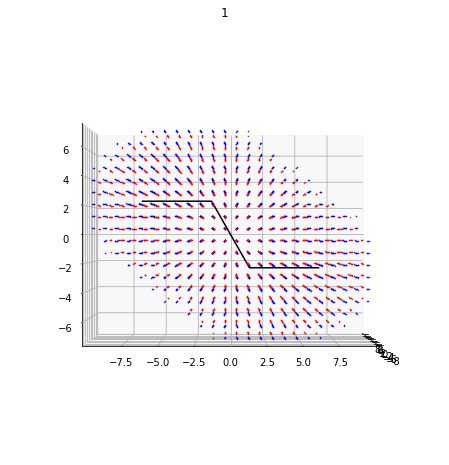

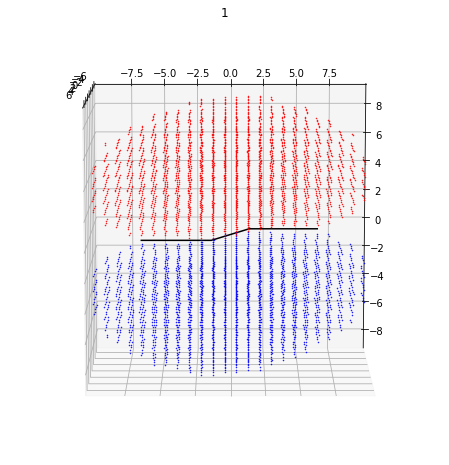

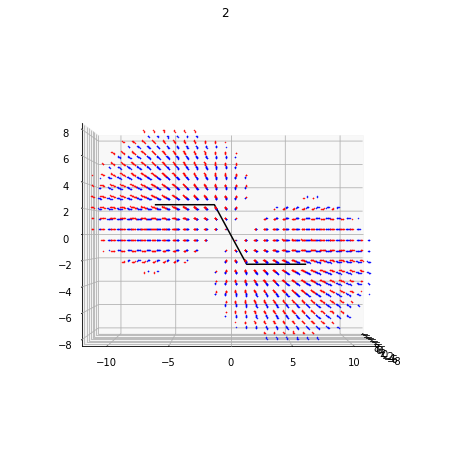

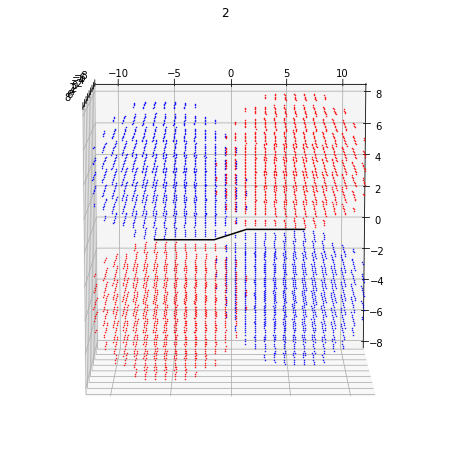

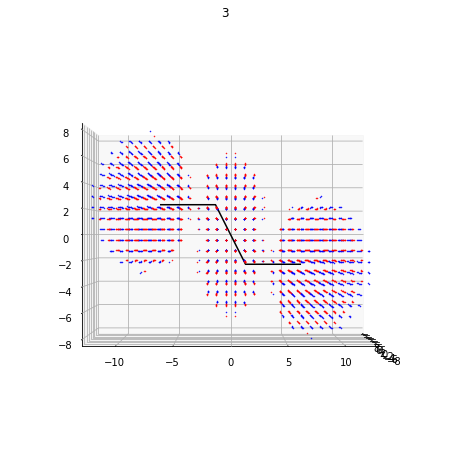

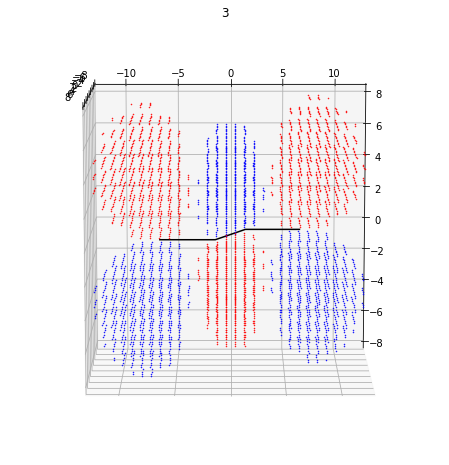

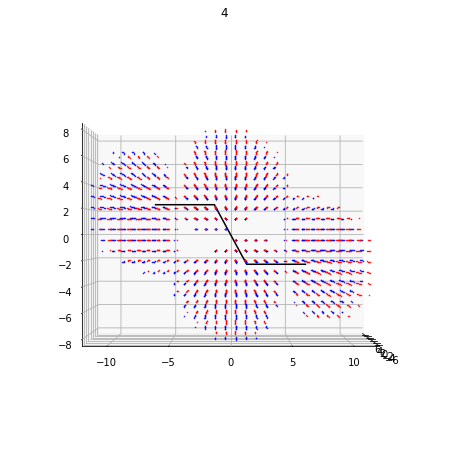

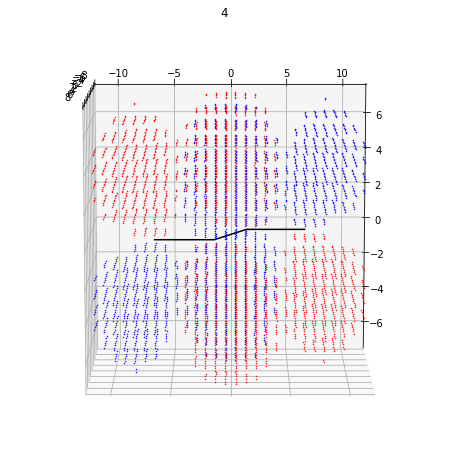

In [8]:
# Butadiene - 90% Plot

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
from scipy.special import sph_harm
import math
%matplotlib inline

n = 1
l = 0
m = 0
Z = 1

# Constants
na = 6.02*np.power(10, 23)
h = 6.63/np.power(10, 34)
c = 3*np.power(10, 8)
    
# Value of beta in jmol-1
beta_si = 230000
# Value of beta per molecule
beta = beta_si/na


# Radial distribution function
def  radial_distribution(r, n, l, Z_eff):
    rho = 2.0 * Z_eff * r / n    
    p = Z*r
    if n == 1  and l == 0 :
        return 2*(Z**1.5)*np.exp(-p)
    elif n == 2  and l == 0 :
         return ((Z/2)**1.5)*(2-p)*np.exp(-p/2)
    elif n == 2  and l == 1:
         return (1/(np.sqrt(3))*((Z/2)**1.5)*p*np.exp(-p/2))
    elif n == 3  and l == 0 :
         return (2/27)*((Z/3)**1.5)*(27-18*p+2*(p**2))*np.exp(-p/3)
    elif n == 3 and l == 1 :
         return (1/27)*((2*Z/3)**1.5)*p*(6-p)*np.exp(-p/3)
    elif n == 3  and l == 2 :
         return (4/(27*np.sqrt(10)))*((Z/3)**1.5)*(p**2)*np.exp(-p/3)

def  spherical_harmonics (theta, phi, l, m):
    if l == 0 :
        if m == 0 :
             # l = 0, m = 0 
            return np.sqrt ( 1.0 / ( 4 * np.pi))
    elif l == 1 :
         if m == 0 :
             # l = 1, m = 0 
            return np.sqrt ( 3.0 / ( 4.0 * np.pi)) * np.cos ( theta)
         if m == 1 :
             # l = 1, m = + 1 
            return np.sqrt (3.0 / ( 4.0 * np.pi)) * np.sin (theta) * np.cos (phi)
         if m ==- 1 :
             # l = 1, m = + 1 
            return np.sqrt ( 3.0 / ( 4.0 * np.pi)) * np.sin (theta) * np.sin (phi)
    else:
         if m == 0 :
            return np.sqrt ( 5.0 / ( 16.0 * np.pi)) * ( 3.0 * (np.cos (theta) ** 2 ) -1.0 )
         if m == 1 :
            return np.sqrt ( 15.0 )/ ( 4.0 * np.pi) * np.cos (theta) * np.sin (theta) * np.cos (phi)
         if m ==- 1 :
            return np.sqrt ( 15.0 / ( 4.0 * np.pi )) * np.cos (theta) * np.sin (theta) * np.sin (phi)
         if m == 2 :
            return np.sqrt ( 15.0 / ( 16.0 * np.pi)) * (np.sin ( theta) ** 2 ) * np.cos ( 2 * phi)
         if m == --2 :
            return np.sqrt ( 15.0 / ( 16.0 * np.pi)) * (np.sin (theta) ** 2) * np.sin ( 2 * phi)

def f(x, y, z, n, l, m, Z_eff): 
        #Convert cartesian coordinate system to polar 
        r = np.sqrt (x * x + y * y + z * z)
        Z = 6-( 0.35 * 3 + 0.85 * 2 )
        theta = 0.0 
        phi = 0.0 
        if r> 0 :
            theta = np.arccos (z / r)
        if y == 0 :
             if x < 0 :
                phi = np.pi
        elif x * x + y * y> 0 :
            phi = np.sign (y) * np.arccos (x / np.sqrt (x * x + y * y))

        # Return the wavefunction of the orbital
        return (radial_distribution(r, n, l, Z_eff) * spherical_harmonics(theta, phi, l, m))

def butadiene(x, y, z, n, l, m, Z_eff):
    # Quantum numbers - Hydrogen 1s
    n = 2
    l = 1
    m = 1
    Z = 6-( 0.35 * 3 + 0.85 * 2 )
    total = 0
    # Distance between atoms
    d_1 = (147.0 / 52.9)*2
    d_2 = (134.0 / 52.9)*2
    c = [
        [ 0.372 , 0.602 , 0.602 , 0.372 ],
        [ 0.602 , 0.372 , -0.372 , -0.602 ],
        [ 0.602 , -0.372 , -0.372 , 0.602 ],
        [ -0.372 , 0.602 , -0.602 , 0.372 ],
    ]
    centre = [[(-d_1/4)-(d_2), d_1*np.sqrt(3)/4], [-d_1/4, d_1*np.sqrt(3)/4], [d_1/4, d_1*-np.sqrt(3)/4], [d_2+(d_1/4), d_1*-np.sqrt(3)/4]]
    for i in range (4):
        total = total + c[orbital][i]*f(x, y+centre[i][0], z+centre[i][1], n, l, m, Z)
    return total


for orbital in range (4):
    
    # Lists for positive data
    x_pos_list = []
    y_pos_list = []
    z_pos_list = []

    # Lists for negative data
    x_neg_list = []
    y_neg_list = []
    z_neg_list = []

    data = []

    N = 35
    spread = 15
    space = 2*spread/N
    prob = 0.0

    for i in range (N):
        for j in range (N):
            for k in range (N):
                
                x = i*space-spread
                y = j*space-spread
                z = k*space-spread
                f_1 = butadiene(x, y, z, n, l, m, Z)
                # Probability distribution function
                f_2 = f_1**2
                data.append([f_2,x,y,z,f_1])
                prob = prob+f_2*space**3
    data = sorted(data, key =lambda data: data[0], reverse=True)
    total = 0.0
    i = 0
    while total<0.9*prob:
        x = data[i][1]
        y = data[i][2]
        z = data[i][3]
        total = total+(data[i][0])*space**3
        if data[i][4] >0:
            x_pos_list.append (x)
            y_pos_list.append (y)
            z_pos_list.append (z)
        else:
            x_neg_list.append (x)
            y_neg_list.append (y)
            z_neg_list.append (z) 
        i = i+1


    # Positive values
    Xpos = np.array (x_pos_list)
    Ypos = np.array (y_pos_list)
    Zpos = np.array (z_pos_list)

    # Negative values
    Xneg = np.array (x_neg_list)
    Yneg = np.array (y_neg_list)
    Zneg = np.array (z_neg_list)
    
    x_range = spread
    ax.set_xlim3d (-x_range, x_range)
    ax.set_ylim3d (-x_range, x_range)
    ax.set_zlim3d (-x_range, x_range)
    
    for o in range(2):
        fig = plt.figure (figsize = ( 8.0 , 8.0 ))
        ax = fig.add_subplot ( 1 , 1 , 1 , projection = '3d' )
        # Plotting the sigma framework
        d_1 = (147.0 / 52.9)*2
        d_2 = (134.0 / 52.9)*2
        centre = [[(-d_1/4)-(d_2), d_1*np.sqrt(3)/4], [-d_1/4, d_1*np.sqrt(3)/4], [d_1/4, d_1*-np.sqrt(3)/4], [d_2+(d_1/4), d_1*-np.sqrt(3)/4]]
        x = []
        y = []
        z = []
        for i in range(4):
            x.append(0)
            y.append(-centre[i][0])
            z.append(-centre[i][1])
        x.append(0)
        y.append(centre[0][0])
        z.append(centre[0][1])
        ax.plot3D(x, y, z, 'black')

        # Finding the max and min values for each axis in order to scale the axes
        ymin = min(min(Ypos), min(Yneg))
        ymax = max(max(Ypos), max(Yneg))
        zmin = min(min(Zpos), min(Zneg))
        zmax = max(max(Zpos), max(Zneg))

        ax.set_xlim3d (max(max(Xpos), max(Xneg)), min(min(Xpos), min(Xneg)))
        ax.set_ylim3d (ymin, ymax)
        ax.set_zlim3d (zmin, zmax)
        ax.title.set_text("{}".format(orbital+1, 'π'))

        # Plot negative values in blue
        ax.plot(Xneg, Yneg, Zneg, color = 'b' , marker = "o", markersize=0.5, linestyle = 'None' )

        # Plot positive values in red
        ax.plot(Xpos, Ypos, Zpos, color = 'r' , marker = "o", markersize=0.5, linestyle = 'None' )

        if o == 0:
            ax.view_init(0, 0)
        else:
            ax.view_init(100, 0)
        plt.show()